# Planar flows

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from target_distribution import target_distribution
from utils.distributions import normal_dist
from utils.plot import plot_all_targets, plot_comparison
from models.flows import Planar, FirstLayer
from models.model import PlanarFlow

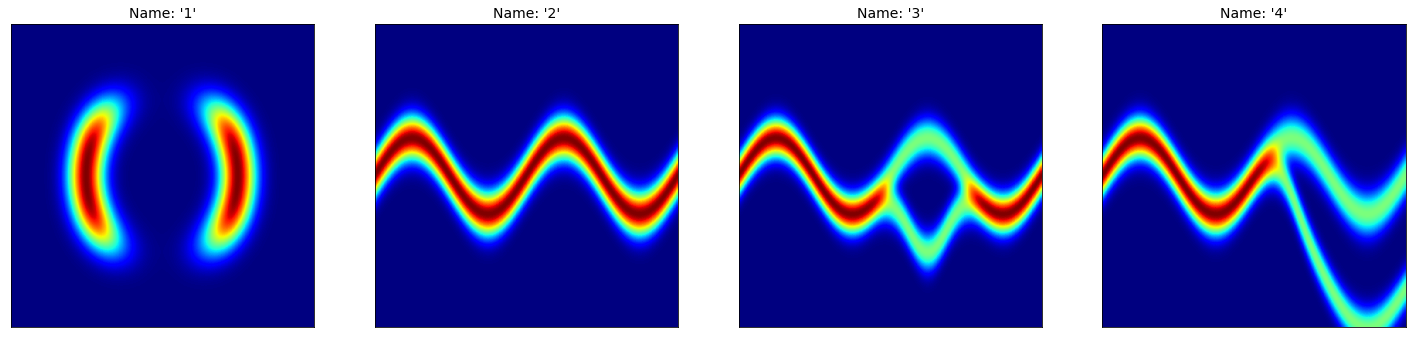

In [2]:
#Plot the four test energy functions of Table 1.
plot_all_targets()

In [3]:
#Loss function, Equation (15)

def binary_loss_function(model, target_distr, z_0, z_k, log_det_jacobians):
               
    log_p_zk = - target_distr(z_k) # ln p(z_k): unnormalized target distribution 
    log_q_z0 = normal_dist(z_0, mean=torch.zeros(2), logvar=torch.zeros(2), dim=1) 

    kl = torch.sum(log_q_z0 - log_p_zk) - torch.sum(log_det_jacobians) #sum over batches      
    kl = kl / z_0.size(0)
    
    return kl 

In [4]:
#Training function 

def train(model, opt, num_batches, batch_size, density):

    model.train()
    
    for  batch_num in range(1, num_batches + 1):
        
        # Get batch from N(0,I).
        batch = torch.zeros(size=(batch_size, 2)).normal_(mean=0, std=1) 
        # Pass batch through flow.
        zk, log_jacobians = model(batch)
        # Compute loss under target distribution.
        loss = binary_loss_function(model, density, batch, zk, log_jacobians) 
        
        #Optimization step, Backpropagation
        opt.zero_grad()
        loss.backward()
        opt.step()
        loss = loss.item()
        
        if batch_num%50000 == 0:
            print('Batch_num: {:3d}/ {:3d} loss: {:.4f}'.format(batch_num, num_batches, loss))

    return loss

In [5]:
def run(target, flow_type, num_flows, num_batches, batch_size, lr):

    print("Density appoximation for test energy function " + target)
    loss = []
    for K in num_flows:
        flow_length = K
        print("Number of flows:")
        print(flow_length)
                       
        # Initializations
        if flow_type == "planar":
            model = PlanarFlow(K=flow_length, z_size=z_size)
            
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        density = target_distribution(target)

        #Training for the target distribution
        train_loss = train(model, optimizer, num_batches, batch_size, density)
        
        plot_comparison(model, target, flow_length)
        loss.append(train_loss)    
        
    return model, loss   

Density appoximation for test energy function 1
Number of flows:
2
Batch_num: 50000/ 200000 loss: 0.2711
Batch_num: 100000/ 200000 loss: 0.1551
Batch_num: 150000/ 200000 loss: 0.2767
Batch_num: 200000/ 200000 loss: 0.3102
Number of flows:
8
Batch_num: 50000/ 200000 loss: 0.0260
Batch_num: 100000/ 200000 loss: -0.0214
Batch_num: 150000/ 200000 loss: -0.0146
Batch_num: 200000/ 200000 loss: -0.0221
Number of flows:
32
Batch_num: 50000/ 200000 loss: -0.0365
Batch_num: 100000/ 200000 loss: -0.0447
Batch_num: 150000/ 200000 loss: -0.0378
Batch_num: 200000/ 200000 loss: -0.0383


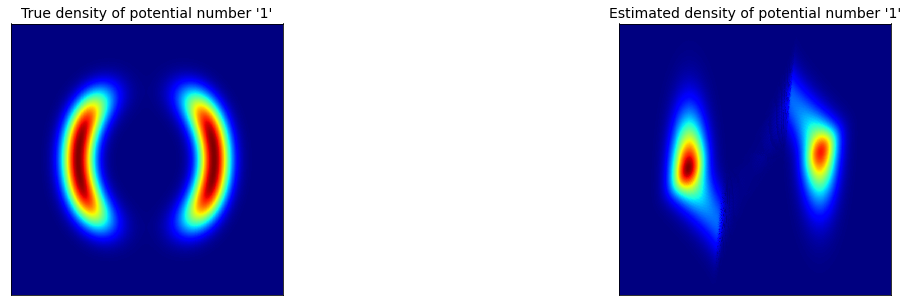

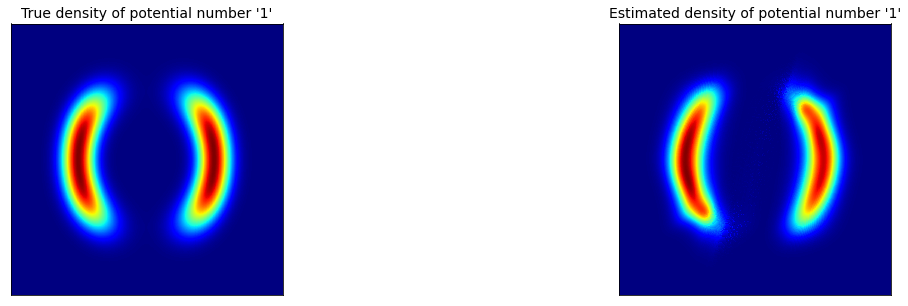

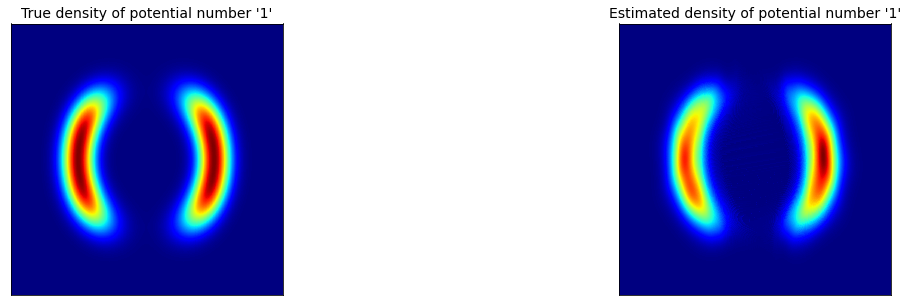

In [9]:
# Define parameters
z_size = 2
num_batches = 1000 * 200
batch_size = 150   
num_flows = [2,8,32]
learning_rate = 5e-4

#Target 1
target_distr = "1"  
model1, loss1 = run(target_distr, "planar", num_flows, num_batches, batch_size, lr = learning_rate)

Density appoximation for test energy function 2
Number of flows:
2
Batch_num: 50000/ 200000 loss: -0.1153
Batch_num: 100000/ 200000 loss: -0.0825
Batch_num: 150000/ 200000 loss: -0.0905
Batch_num: 200000/ 200000 loss: -0.1915
Number of flows:
8
Batch_num: 50000/ 200000 loss: -0.5224
Batch_num: 100000/ 200000 loss: -0.9574
Batch_num: 150000/ 200000 loss: -0.9736
Batch_num: 200000/ 200000 loss: -0.9748
Number of flows:
32
Batch_num: 50000/ 200000 loss: -1.0164
Batch_num: 100000/ 200000 loss: -1.0491
Batch_num: 150000/ 200000 loss: -1.1145
Batch_num: 200000/ 200000 loss: -1.0497


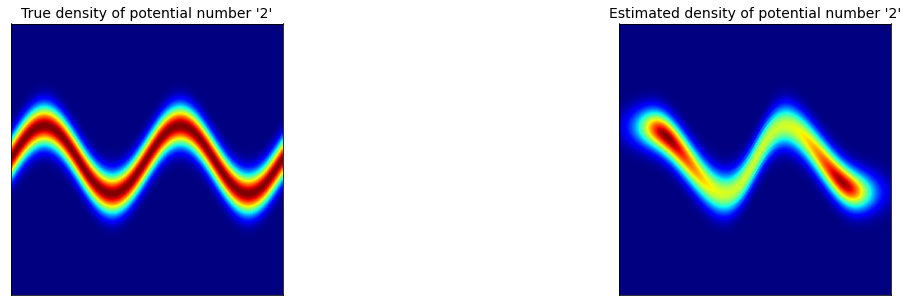

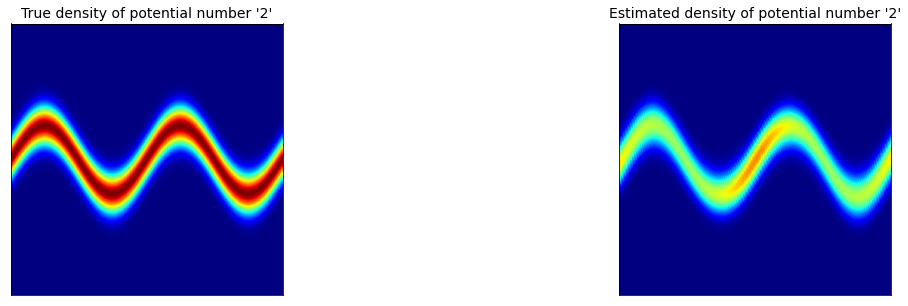

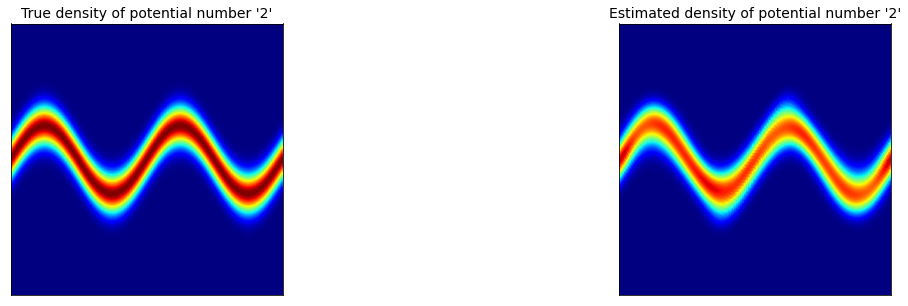

In [13]:
#Target 2
target_distr = "2"  
model2, loss2 = run(target_distr, "planar", num_flows, num_batches, batch_size, lr = learning_rate)

Density appoximation for test energy function 3
Number of flows:
2
Batch_num: 50000/ 200000 loss: -0.9694
Batch_num: 100000/ 200000 loss: -2.6687
Batch_num: 150000/ 200000 loss: -3.0328
Batch_num: 200000/ 200000 loss: -3.0374
Number of flows:
8
Batch_num: 50000/ 200000 loss: -1.1035
Batch_num: 100000/ 200000 loss: -1.2841
Batch_num: 150000/ 200000 loss: -1.2976
Batch_num: 200000/ 200000 loss: -1.3177
Number of flows:
32
Batch_num: 50000/ 200000 loss: -1.2410
Batch_num: 100000/ 200000 loss: -1.5594
Batch_num: 150000/ 200000 loss: -1.5869
Batch_num: 200000/ 200000 loss: -1.5727


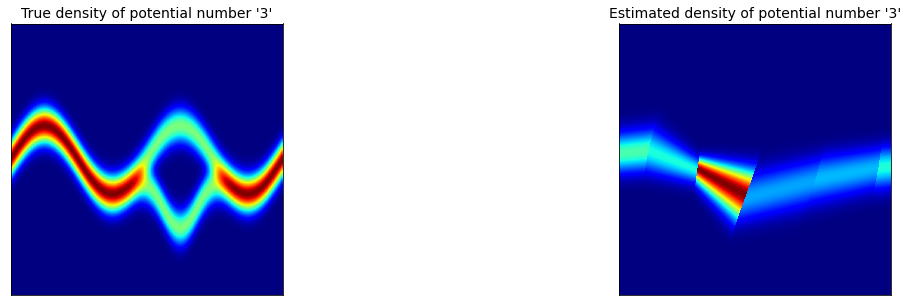

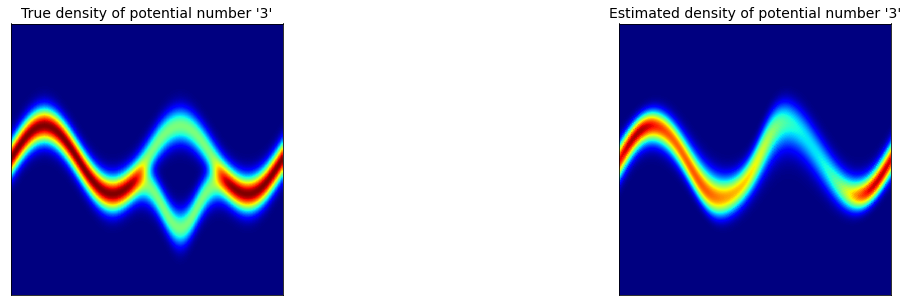

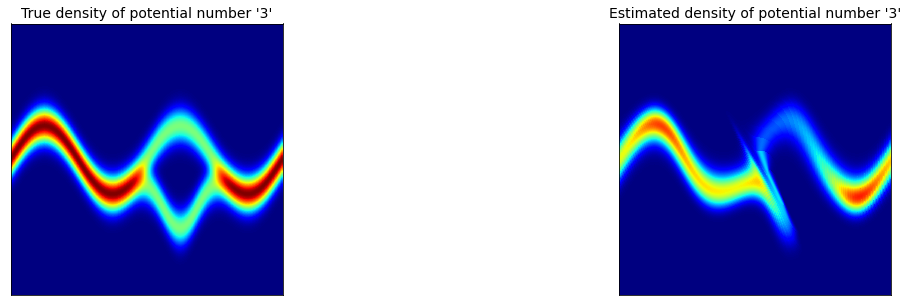

In [14]:
#Target 3
target_distr = "3"  
model3, loss3 = run(target_distr, "planar", num_flows, num_batches, batch_size, lr = learning_rate)

Density appoximation for test energy function 4
Number of flows:
2
Batch_num: 50000/ 400000 loss: -0.3883
Batch_num: 100000/ 400000 loss: -0.5132
Batch_num: 150000/ 400000 loss: -0.4695
Batch_num: 200000/ 400000 loss: -0.4968
Batch_num: 250000/ 400000 loss: -0.5365
Batch_num: 300000/ 400000 loss: -0.4608
Batch_num: 350000/ 400000 loss: -0.4852
Batch_num: 400000/ 400000 loss: -0.5428
Number of flows:
8
Batch_num: 50000/ 400000 loss: -0.7427
Batch_num: 100000/ 400000 loss: -1.0398
Batch_num: 150000/ 400000 loss: -1.2435
Batch_num: 200000/ 400000 loss: -1.2059
Batch_num: 250000/ 400000 loss: -1.2352
Batch_num: 300000/ 400000 loss: -1.2317
Batch_num: 350000/ 400000 loss: -1.2272
Batch_num: 400000/ 400000 loss: -1.2389
Number of flows:
32
Batch_num: 50000/ 400000 loss: -1.2533
Batch_num: 100000/ 400000 loss: -1.4189
Batch_num: 150000/ 400000 loss: -1.5678
Batch_num: 200000/ 400000 loss: -1.6952
Batch_num: 250000/ 400000 loss: -1.6972
Batch_num: 300000/ 400000 loss: -1.6977
Batch_num: 350000

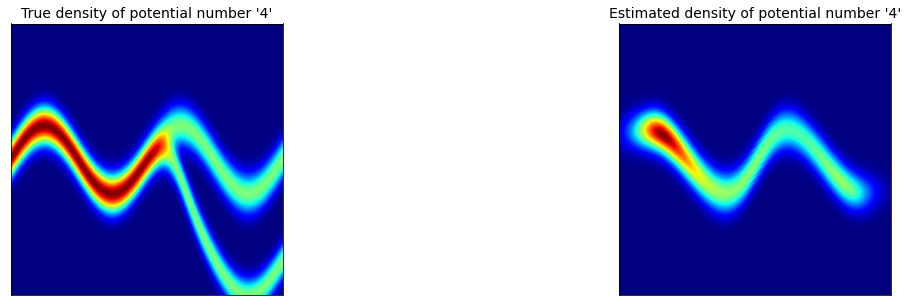

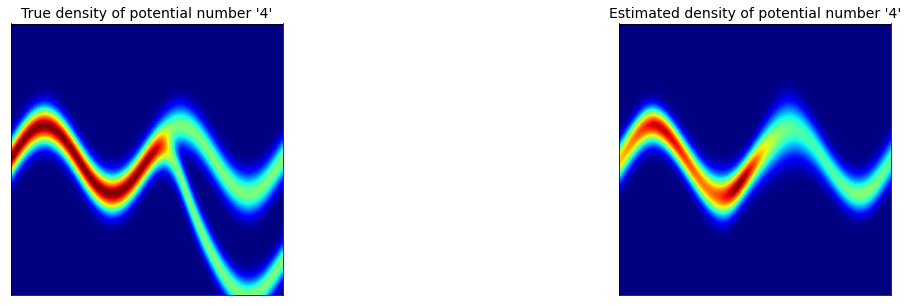

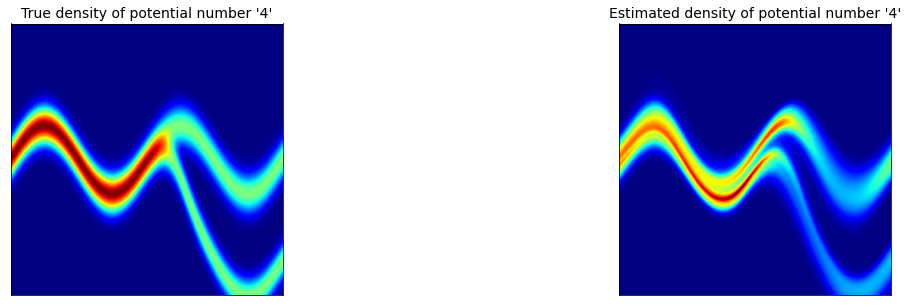

In [15]:
#Target 4
target_distr = "4"  
num_batches = 1000 * 400
model_4, loss_4 = run(target_distr, "planar", num_flows, num_batches, batch_size, lr = learning_rate)

Density appoximation for test energy function 3
Number of flows:
2
Batch_num: 50000/ 200000 loss: -0.1849
Batch_num: 100000/ 200000 loss: -0.2660
Batch_num: 150000/ 200000 loss: -0.1127
Batch_num: 200000/ 200000 loss: -0.3981
Number of flows:
8
Batch_num: 50000/ 200000 loss: -0.9538
Batch_num: 100000/ 200000 loss: -1.1116
Batch_num: 150000/ 200000 loss: -1.3031
Batch_num: 200000/ 200000 loss: -1.3469
Number of flows:
32
Batch_num: 50000/ 200000 loss: -1.4056
Batch_num: 100000/ 200000 loss: -1.5872
Batch_num: 150000/ 200000 loss: -1.7280
Batch_num: 200000/ 200000 loss: -1.7441


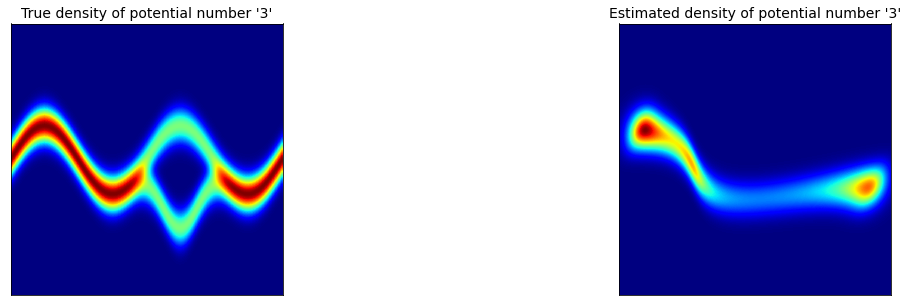

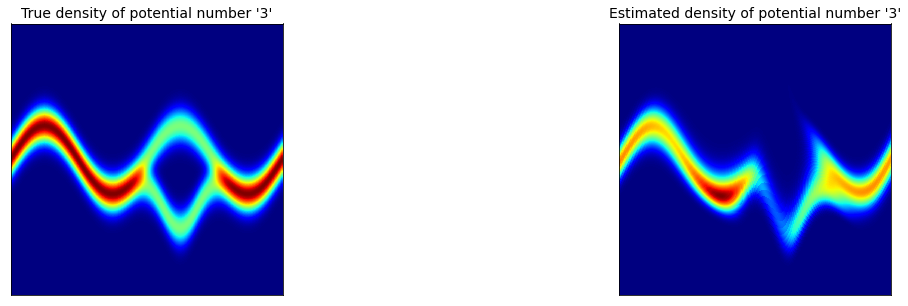

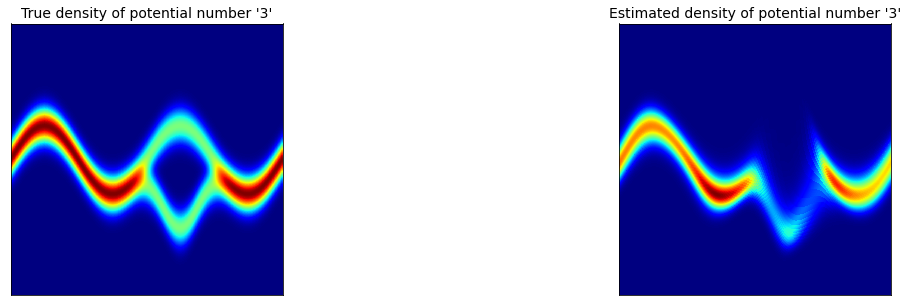

In [19]:
# Define parameters
#Target 3 with learning_rate = 4e-4
target_distr = "3"  
num_batches = 1000 * 200
learning_rate = 4e-4
model3_, loss3_ = run(target_distr, "planar", num_flows, num_batches, batch_size, lr = learning_rate)